In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Preplacementdata.csv')
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isna().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

### NormalDistribution

In [5]:
import seaborn as sns

C:\Users\LENOVO\anaconda3\envs\clustering\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


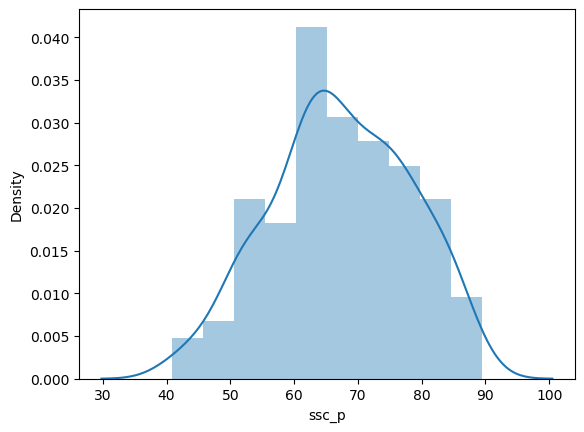

In [7]:
sns.distplot(dataset['ssc_p'])

In [12]:
def get_sum_probabilities(dataset,startrange,endrange):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='pink')
    plt.axvline(startrange,color='Red')
    plt.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_stddev=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_stddev))
    dist=norm(sample_mean,sample_stddev)
#     values=[value for value in range(startrange,endrange)]
#     probabilities=[dist.pdf(value) for value in values]
    probabilities=[dist.pdf(value) for value in range(startrange,endrange)]
    prob=sum(probabilities)
    print('The area range between({}:{}),{}'.format(startrange,endrange,prob))
    return prob

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=67.303, Standard Deviation=10.827
The area range between(60:80),0.6346413295441958


0.6346413295441958

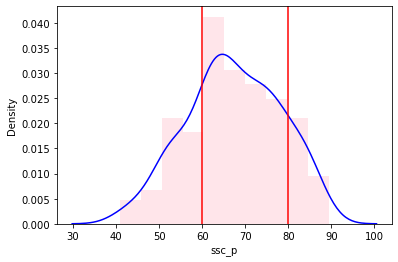

In [13]:
get_sum_probabilities(dataset['ssc_p'],60,80)

In [135]:
sample=dataset
sample_mean=sample.mean()
sample_stddev=sample.std()
print('Mean and StandardDeviation values is:',(sample_mean, sample_stddev))

Mean and StandardDeviation values is: (sl_no          108.000000
ssc_p           67.303395
hsc_p           66.333163
degree_p        66.370186
etest_p         72.100558
mba_p           62.278186
salary      288655.405405
dtype: float64, sl_no          62.209324
ssc_p          10.827205
hsc_p          10.897509
degree_p        7.358743
etest_p        13.275956
mba_p           5.833385
salary      77457.900102
dtype: float64)


### CumulativeDensityFunction

In [100]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00


In [101]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

### Z_score

In [128]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    stddev=dataset.std()
#     values=[i for i in dataset]
#     z_score=[((j-mean)/stddev) for j in values]
    z_score=[((j-mean)/stddev) for j in dataset]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score) 

C:\Users\LENOVO\anaconda3\envs\clustering\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


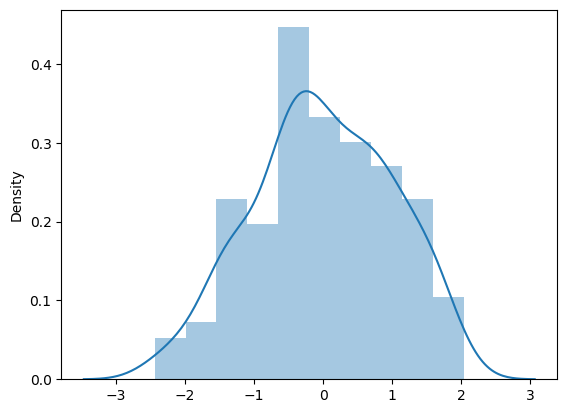

In [129]:
stdNBgraph(dataset['ssc_p'])

In [130]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    stddev=dataset.std()
#     values=[i for i in dataset]
#     z_score=[((j-mean)/stddev) for j in values]
    z_score=[((j-mean)/stddev) for j in dataset]
    sns.distplot(z_score,kde=True)
    Sum=sum(z_score)/len(z_score) 
    return Sum

C:\Users\LENOVO\anaconda3\envs\clustering\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


-4.2911410858767677e-16

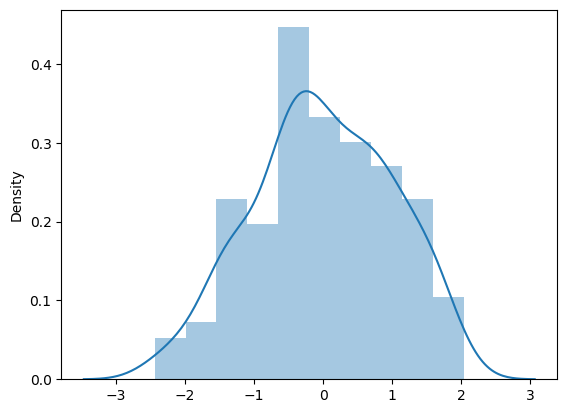

In [131]:
stdNBgraph(dataset['ssc_p'])